## Transfer Learning ResNet101 using Keras

Please download the dataset from the below url

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train'
valid_path = '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet101= ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




171450368/171446536 [==============================] - 4s 0us/step


In [ ]:
resnet101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
# don't train existing weights
for layer in resnet101.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/*')

In [ ]:
folders


['/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/diseased cotton plant',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/diseased cotton leaf',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/fresh cotton leaf',
 '/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train/fresh cotton plant']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet101.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet101.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1949 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 1099s 18s/step - loss: 3.1652 - accuracy: 0.4135 - val_loss: 1.3211 - val_accuracy: 0.5094
Epoch 2/20
61/61 [==============================] - 36s 591ms/step - loss: 1.1524 - accuracy: 0.5541 - val_loss: 1.4510 - val_accuracy: 0.6226
Epoch 3/20
61/61 [==============================] - 36s 596ms/step - loss: 0.9117 - accuracy: 0.6599 - val_loss: 0.8945 - val_accuracy: 0.5943
Epoch 4/20
61/61 [==============================] - 36s 594ms/step - loss: 1.0305 - accuracy: 0.6016 - val_loss: 0.9181 - val_accuracy: 0.6038
Epoch 5/20
61/61 [==============================] - 37s 602ms/step - loss: 0.9645 - accuracy: 0.6612 - val_loss: 1.5582 - val_accuracy: 0.5377
Epoch 6/20
61/61 [==============================] - 37s 602ms/step - loss: 0.9098 - accuracy: 0.6503 - val_loss: 0.8197 - val_accuracy: 0.6509
Epoch 7/20
61/61 [==============================] - 37s 602ms/step - loss: 0.7419 - accuracy: 0.7015 - val_loss: 0.8291 - val_accuracy: 0.6509

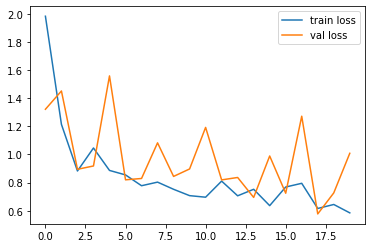

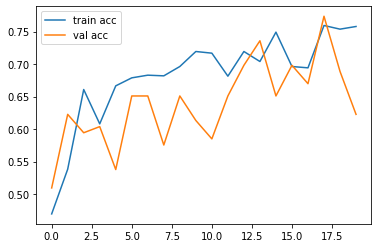

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/cottonseed Dataset/Dataset/val/fresh cotton leaf/d (229)_iaip.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
predictions[result.argmax()]

'fresh cotton leaf'